<a href="https://colab.research.google.com/github/V1L3La/Learning-An-lise-de-Dados-em-Python/blob/main/Fake_Analise_do_Eleitorado_brasileiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/V1L3La/Learning-An-lise-de-Dados-em-Python/main/eleitorado_municipio_2020.csv', sep=';', encoding = 'latin1', decimal=',')  
df.head(6)

,NR_ANO_ELEICAO,CD_PAIS,NM_PAIS,SG_REGIAO,NM_REGIAO,SG_UF,NM_UF,CD_MUNICIPIO,NM_MUNICIPIO,QTD_ELEITORES,QTD_ELEITORES_FEMININO,QTD_ELEITORES_MASCULINO,QTD_ELEITORES_NAOINFORMADO,QTD_ELEITORES_MENOR16,QTD_ELEITORES_16,QTD_ELEITORES_17,QTD_ELEITORES_18,QTD_ELEITORES_19,QTD_ELEITORES_20,QTD_ELEITORES_21A24,QTD_ELEITORES_25A29,QTD_ELEITORES_30A34,QTD_ELEITORES_35A39,QTD_ELEITORES_40A44,QTD_ELEITORES_45A49,QTD_ELEITORES_50A54,QTD_ELEITORES_55A59,QTD_ELEITORES_60A64,QTD_ELEITORES_65A69,QTD_ELEITORES_70A74,QTD_ELEITORES_75A79,QTD_ELEITORES_80A84,QTD_ELEITORES_85A89,QTD_ELEITORES_90A94,QTD_ELEITORES_95A99,QTD_ELEITORES_MAIORIGUAL100,QTD_ELEITORES_IDADEINVALIDO,QTD_ELEITORES_IDADENAOSEAPLICA,QTD_ELEITORES_IDADENAOINFORMADA,QTD_ELEITORES_COMBIOMETRIA,QTD_ELEITORES_SEMBIOMETRIA,QTD_ELEITORES_DEFICIENTE,QUANTITATIVO_NOMESOCIAL
0,2020,1,Brasil,N,Norte,AC,Acre,1120,ACRELÂNDIA,9169,4502,4667,0,0,22,85,115,173,255,934,1080,971,1082,962,761,700,610,493,367,272,152,83,41,10,1,0,0,0,0,9101,68,39,0
1,2020,1,Brasil,N,Norte,AC,Acre,1570,ASSIS BRASIL,5913,2993,2920,0,0,21,50,84,122,151,608,775,742,682,614,508,392,324,261,199,168,104,54,34,15,4,1,0,0,0,5862,51,16,0
2,2020,1,Brasil,N,Norte,AC,Acre,1058,BRASILÉIA,16844,8653,8191,0,0,32,126,233,393,434,1789,2069,1936,1841,1723,1471,1317,1048,791,658,467,261,148,73,22,5,7,0,0,0,16638,206,126,0
3,2020,1,Brasil,N,Norte,AC,Acre,1007,BUJARI,9613,4736,4877,0,0,34,106,162,217,256,1085,1101,1054,1042,1074,824,711,592,471,393,221,150,80,23,13,4,0,0,0,0,9576,37,25,0
4,2020,1,Brasil,N,Norte,AC,Acre,1015,CAPIXABA,7540,3707,3833,0,0,18,102,158,214,218,877,866,779,740,685,696,599,520,404,289,186,108,60,8,11,2,0,0,0,0,7476,64,86,0
5,2020,1,Brasil,N,Norte,AC,Acre,1074,CRUZEIRO DO SUL,55749,29177,26572,0,0,183,527,1120,1581,1677,6935,7011,6497,6655,5757,4467,3453,2686,2198,1802,1293,923,576,240,116,44,8,0,0,0,55502,247,139,1


In [2]:
df.head(6).T

,0,1,2,3,4,5
NR_ANO_ELEICAO,2020,2020,2020,2020,2020,2020
CD_PAIS,1,1,1,1,1,1
NM_PAIS,Brasil,Brasil,Brasil,Brasil,Brasil,Brasil
SG_REGIAO,N,N,N,N,N,N
NM_REGIAO,Norte,Norte,Norte,Norte,Norte,Norte
SG_UF,AC,AC,AC,AC,AC,AC
NM_UF,Acre,Acre,Acre,Acre,Acre,Acre
CD_MUNICIPIO,1120,1570,1058,1007,1015,1074
NM_MUNICIPIO,ACRELÂNDIA,ASSIS BRASIL,BRASILÉIA,BUJARI,CAPIXABA,CRUZEIRO DO SUL
QTD_ELEITORES,9169,5913,16844,9613,7540,55749


In [3]:
# tipos e quantidades
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   NR_ANO_ELEICAO                   5568 non-null   int64 
 1   CD_PAIS                          5568 non-null   int64 
 2   NM_PAIS                          5568 non-null   object
 3   SG_REGIAO                        5568 non-null   object
 4   NM_REGIAO                        5568 non-null   object
 5   SG_UF                            5568 non-null   object
 6   NM_UF                            5568 non-null   object
 7   CD_MUNICIPIO                     5568 non-null   int64 
 8   NM_MUNICIPIO                     5568 non-null   object
 9   QTD_ELEITORES                    5568 non-null   int64 
 10  QTD_ELEITORES_FEMININO           5568 non-null   int64 
 11  QTD_ELEITORES_MASCULINO          5568 non-null   int64 
 12  QTD_ELEITORES_NAOINFORMADO       5

In [22]:
# Cidade que tem maior número de eleitores deficientes     
def_max = df.nlargest(1, 'QTD_ELEITORES_DEFICIENTE') 
def_max['NM_MUNICIPIO']
#OU.....def_max = df['QTD_ELEITORES_DEFICIENTE'].max()
        #def_max

5356    SÃO PAULO
Name: NM_MUNICIPIO, dtype: object

In [5]:
# 5 Cidades com maior número de eleitores deficientes 
# df.sort_values(by=['col1'])
# df.nlargest(3, 'population', keep='last')
df.nlargest(5, 'QTD_ELEITORES_DEFICIENTE', keep='last')

,NR_ANO_ELEICAO,CD_PAIS,NM_PAIS,SG_REGIAO,NM_REGIAO,SG_UF,NM_UF,CD_MUNICIPIO,NM_MUNICIPIO,QTD_ELEITORES,QTD_ELEITORES_FEMININO,QTD_ELEITORES_MASCULINO,QTD_ELEITORES_NAOINFORMADO,QTD_ELEITORES_MENOR16,QTD_ELEITORES_16,QTD_ELEITORES_17,QTD_ELEITORES_18,QTD_ELEITORES_19,QTD_ELEITORES_20,QTD_ELEITORES_21A24,QTD_ELEITORES_25A29,QTD_ELEITORES_30A34,QTD_ELEITORES_35A39,QTD_ELEITORES_40A44,QTD_ELEITORES_45A49,QTD_ELEITORES_50A54,QTD_ELEITORES_55A59,QTD_ELEITORES_60A64,QTD_ELEITORES_65A69,QTD_ELEITORES_70A74,QTD_ELEITORES_75A79,QTD_ELEITORES_80A84,QTD_ELEITORES_85A89,QTD_ELEITORES_90A94,QTD_ELEITORES_95A99,QTD_ELEITORES_MAIORIGUAL100,QTD_ELEITORES_IDADEINVALIDO,QTD_ELEITORES_IDADENAOSEAPLICA,QTD_ELEITORES_IDADENAOINFORMADA,QTD_ELEITORES_COMBIOMETRIA,QTD_ELEITORES_SEMBIOMETRIA,QTD_ELEITORES_DEFICIENTE,QUANTITATIVO_NOMESOCIAL
5356,2020,1,Brasil,SE,Sudeste,SP,São Paulo,71072,SÃO PAULO,8986687,4861465,4117640,7582,0,1968,16373,58158,116759,153388,684578,834484,901664,978867,924454,823051,755108,699883,600360,472606,340881,229333,161819,99965,75281,51741,5889,77,0,0,5404466,3582221,154981,982
3658,2020,1,Brasil,SE,Sudeste,RJ,Rio de Janeiro,60011,RIO DE JANEIRO,4851887,2654315,2193088,4484,0,945,7078,26994,55768,76008,346115,427448,427538,467308,449244,406736,383178,398019,360767,300248,224173,155947,117231,79769,76888,60445,3989,51,0,0,2495709,2356178,27263,283
4988,2020,1,Brasil,SE,Sudeste,SP,São Paulo,64777,GUARULHOS,872880,468083,404796,1,0,295,2258,7394,15430,20754,87239,93151,94070,99299,91894,84815,77622,66451,54469,41013,23554,8861,3145,903,224,28,3,8,0,0,870016,2864,22659,97
535,2020,1,Brasil,NE,Nordeste,BA,Bahia,38490,SALVADOR,1897098,1053120,843977,1,0,500,3616,11694,23548,32811,149855,188281,197293,236223,222149,184670,167923,152091,126157,94737,59024,26382,13104,5064,1613,302,54,7,0,0,1891978,5120,19486,135
4008,2020,1,Brasil,S,Sul,RS,Rio Grande do Sul,85995,CAXIAS DO SUL,333696,175323,158373,0,0,146,981,2499,4543,5665,24956,32390,34909,37476,33150,29165,28124,28813,25132,19514,13465,6902,3590,1638,531,98,9,0,0,0,332752,944,17884,22


In [6]:
print('Eleitoras:', df['QTD_ELEITORES_FEMININO'].sum())
print('Eleitores:', df['QTD_ELEITORES_MASCULINO'].sum())
print('Não informados:', df['QTD_ELEITORES_NAOINFORMADO'].sum())

Eleitoras: 77649569
Eleitores: 70228457
Não informados: 40457


In [7]:
#1 criar variaveis para calcular o percentual
tot_eleitores = df['QTD_ELEITORES'].sum()
tot_fem = df['QTD_ELEITORES_FEMININO'].sum()
tot_masc = df['QTD_ELEITORES_MASCULINO'].sum()
tot_ninfo = df['QTD_ELEITORES_NAOINFORMADO'].sum()

In [8]:
#2 Mostrar os valores percentalmente
print('Eleitoras:', (tot_fem/tot_eleitores * 100).round(2))
print('Eleitores:', (tot_masc/tot_eleitores * 100).round(2))
print('Não informados:', (tot_ninfo/tot_eleitores * 100).round(2))

Eleitoras: 52.49
Eleitores: 47.48
Não informados: 0.03


In [9]:
df.dtypes

NR_ANO_ELEICAO                      int64
CD_PAIS                             int64
NM_PAIS                            object
SG_REGIAO                          object
NM_REGIAO                          object
SG_UF                              object
NM_UF                              object
CD_MUNICIPIO                        int64
NM_MUNICIPIO                       object
QTD_ELEITORES                       int64
QTD_ELEITORES_FEMININO              int64
QTD_ELEITORES_MASCULINO             int64
QTD_ELEITORES_NAOINFORMADO          int64
QTD_ELEITORES_MENOR16               int64
QTD_ELEITORES_16                    int64
QTD_ELEITORES_17                    int64
QTD_ELEITORES_18                    int64
QTD_ELEITORES_19                    int64
QTD_ELEITORES_20                    int64
QTD_ELEITORES_21A24                 int64
QTD_ELEITORES_25A29                 int64
QTD_ELEITORES_30A34                 int64
QTD_ELEITORES_35A39                 int64
QTD_ELEITORES_40A44               

In [10]:
# Quantos municipios com mais homens que mulheres?
df[df['QTD_ELEITORES_MASCULINO'] > df['QTD_ELEITORES_FEMININO']].count()


NR_ANO_ELEICAO                     2171
CD_PAIS                            2171
NM_PAIS                            2171
SG_REGIAO                          2171
NM_REGIAO                          2171
SG_UF                              2171
NM_UF                              2171
CD_MUNICIPIO                       2171
NM_MUNICIPIO                       2171
QTD_ELEITORES                      2171
QTD_ELEITORES_FEMININO             2171
QTD_ELEITORES_MASCULINO            2171
QTD_ELEITORES_NAOINFORMADO         2171
QTD_ELEITORES_MENOR16              2171
QTD_ELEITORES_16                   2171
QTD_ELEITORES_17                   2171
QTD_ELEITORES_18                   2171
QTD_ELEITORES_19                   2171
QTD_ELEITORES_20                   2171
QTD_ELEITORES_21A24                2171
QTD_ELEITORES_25A29                2171
QTD_ELEITORES_30A34                2171
QTD_ELEITORES_35A39                2171
QTD_ELEITORES_40A44                2171
QTD_ELEITORES_45A49                2171


In [11]:
# Cria coluna nova para indicar relação fem/masc
df['Relação_F_M'] = df['QTD_ELEITORES_FEMININO'] / df['QTD_ELEITORES_MASCULINO']
df

,NR_ANO_ELEICAO,CD_PAIS,NM_PAIS,SG_REGIAO,NM_REGIAO,SG_UF,NM_UF,CD_MUNICIPIO,NM_MUNICIPIO,QTD_ELEITORES,QTD_ELEITORES_FEMININO,QTD_ELEITORES_MASCULINO,QTD_ELEITORES_NAOINFORMADO,QTD_ELEITORES_MENOR16,QTD_ELEITORES_16,QTD_ELEITORES_17,QTD_ELEITORES_18,QTD_ELEITORES_19,QTD_ELEITORES_20,QTD_ELEITORES_21A24,QTD_ELEITORES_25A29,QTD_ELEITORES_30A34,QTD_ELEITORES_35A39,QTD_ELEITORES_40A44,QTD_ELEITORES_45A49,QTD_ELEITORES_50A54,QTD_ELEITORES_55A59,QTD_ELEITORES_60A64,QTD_ELEITORES_65A69,QTD_ELEITORES_70A74,QTD_ELEITORES_75A79,QTD_ELEITORES_80A84,QTD_ELEITORES_85A89,QTD_ELEITORES_90A94,QTD_ELEITORES_95A99,QTD_ELEITORES_MAIORIGUAL100,QTD_ELEITORES_IDADEINVALIDO,QTD_ELEITORES_IDADENAOSEAPLICA,QTD_ELEITORES_IDADENAOINFORMADA,QTD_ELEITORES_COMBIOMETRIA,QTD_ELEITORES_SEMBIOMETRIA,QTD_ELEITORES_DEFICIENTE,QUANTITATIVO_NOMESOCIAL,Relação_F_M
0,2020,1,Brasil,N,Norte,AC,Acre,1120,ACRELÂNDIA,9169,4502,4667,0,0,22,85,115,173,255,934,1080,971,1082,962,761,700,610,493,367,272,152,83,41,10,1,0,0,0,0,9101,68,39,0,0.964645
1,2020,1,Brasil,N,Norte,AC,Acre,1570,ASSIS BRASIL,5913,2993,2920,0,0,21,50,84,122,151,608,775,742,682,614,508,392,324,261,199,168,104,54,34,15,4,1,0,0,0,5862,51,16,0,1.025000
2,2020,1,Brasil,N,Norte,AC,Acre,1058,BRASILÉIA,16844,8653,8191,0,0,32,126,233,393,434,1789,2069,1936,1841,1723,1471,1317,1048,791,658,467,261,148,73,22,5,7,0,0,0,16638,206,126,0,1.056403
3,2020,1,Brasil,N,Norte,AC,Acre,1007,BUJARI,9613,4736,4877,0,0,34,106,162,217,256,1085,1101,1054,1042,1074,824,711,592,471,393,221,150,80,23,13,4,0,0,0,0,9576,37,25,0,0.971089
4,2020,1,Brasil,N,Norte,AC,Acre,1015,CAPIXABA,7540,3707,3833,0,0,18,102,158,214,218,877,866,779,740,685,696,599,520,404,289,186,108,60,8,11,2,0,0,0,0,7476,64,86,0,0.967128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,2020,1,Brasil,N,Norte,TO,Tocatins,96199,TOCANTÍNIA,4606,2269,2337,0,0,19,42,86,88,123,571,626,548,485,404,370,284,288,233,152,119,82,48,18,13,5,2,0,0,0,4545,61,21,0,0.970903
5564,2020,1,Brasil,N,Norte,TO,Tocatins,73458,TUPIRAMA,1929,886,1043,0,0,20,24,36,39,41,188,221,217,198,193,162,156,126,99,74,66,30,21,13,4,1,0,0,0,0,1912,17,18,0,0.849473
5565,2020,1,Brasil,N,Norte,TO,Tocatins,73237,TUPIRATINS,1838,871,967,0,0,18,34,36,34,46,153,180,175,175,194,136,154,149,122,85,58,41,25,13,7,3,0,0,0,0,1801,37,9,0,0.900724
5566,2020,1,Brasil,N,Norte,TO,Tocatins,96652,WANDERLÂNDIA,6573,3234,3339,0,0,17,101,118,123,154,591,604,607,693,676,588,524,426,404,318,272,154,113,59,26,5,0,0,0,0,6520,53,121,3,0.968553


In [12]:
# Quais são os municipios com maior relação f/m
df.nlargest(5, 'Relação_F_M', keep='last').T

,3651,2892,535,3638,67
NR_ANO_ELEICAO,2020,2020,2020,2020,2020
CD_PAIS,1,1,1,1,1
NM_PAIS,Brasil,Brasil,Brasil,Brasil,Brasil
SG_REGIAO,SE,NE,NE,SE,NE
NM_REGIAO,Sudeste,Nordeste,Nordeste,Sudeste,Nordeste
SG_UF,RJ,PE,BA,RJ,AL
NM_UF,Rio de Janeiro,Pernambuco,Bahia,Rio de Janeiro,Alagoas
CD_MUNICIPIO,58122,24910,38490,58653,27855
NM_MUNICIPIO,QUEIMADOS,OLINDA,SALVADOR,NITERÓI,MACEIÓ
QTD_ELEITORES,87662,282952,1897098,391268,592388


In [13]:
# Quais são os municipios com menor relação f/m
df.nsmallest(5, 'Relação_F_M', keep='last').T

,2395,1236,2361,2388,2345
NR_ANO_ELEICAO,2020,2020,2020,2020,2020
CD_PAIS,1,1,1,1,1
NM_PAIS,Brasil,Brasil,Brasil,Brasil,Brasil
SG_REGIAO,CO,NE,CO,CO,CO
NM_REGIAO,Centro-Oeste,Nordeste,Centro-Oeste,Centro-Oeste,Centro-Oeste
SG_UF,MT,MA,MT,MT,MT
NM_UF,Mato Grosso,Maranhão,Mato Grosso,Mato Grosso,Mato Grosso
CD_MUNICIPIO,90921,7900,90948,90980,90387
NM_MUNICIPIO,SERRA NOVA DOURADA,MARAJÁ DO SENA,NOVO SANTO ANTÔNIO,SANTA CRUZ DO XINGU,NOVA BANDEIRANTES
QTD_ELEITORES,1578,6531,1775,1673,8859


### ![Alt Text](https://media.giphy.com/media/8gNQZ9IpkcdiAjfOgN/giphy.gif)

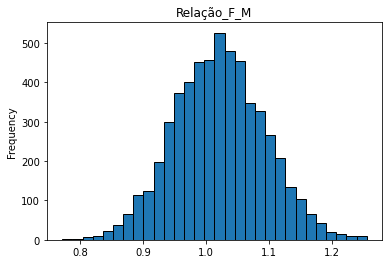

In [21]:
# Plotar um gráfico de distribuição da relação f/m
df['Relação_F_M'].plot.hist(title='Relação_F_M', bins=30, edgecolor='black')

In [ ]:
# importando Seaborb
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Plotar um gráfico de distribuição da relação f/m
sns.distplot(df['Relação_F_M'], bins=30, color='blue', kde=False)  # sem linha de dispersão(em volta do gráfico) 

#embelezando o gráfico
plt.title('Relação Eleitoras / Eleitores', fontsize=14)  # Titulo do gráfico
plt.xlabel('Eleitoras / Eleitores', fontsize=10)  # descrição em x
plt.ylabel('Frequência', fontsize=10)  #descrição em y
plt.axvline(1.0, color='black', linestyle='--')  # traça uma linha vertical em um valor no eixo x com estilo pontilhado


In [ ]:
# Verificar a distribuição f/m mas mostrando os pontos(municipios)
sns.swarmplot(data=df, x='NM_MUNICIPIO', y='Relação_F_M')
plt.axhline(1.0, color='black', linestyle='--')

In [15]:
# vamos plotar a quantidade total de eleitores p faixa etária
# usando o grafico de barras horizontal

#1 listar colunas de nosso interesse (de 16 a 20 anos)
lista = ['QTD_ELEITORES_16', 'QTD_ELEITORES_17','QTD_ELEITORES_18', 'QTD_ELEITORES_19', "QTD_ELEITORES_20" ]
total_idade_16_20 = df[lista].sum()

In [ ]:
total_idade_16_20

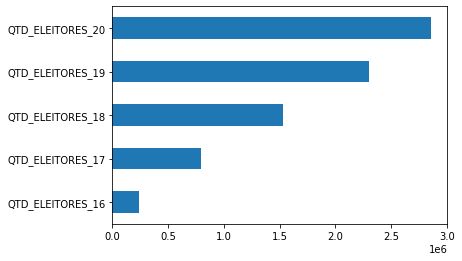

In [19]:
#2 Mostrando no gráfico de barras
total_idade_16_20.plot.barh()